<b>Disclaimer:</b> This is the cleaned and reduced version of the notebook, I've filtered out all the messy and not that interesting results, thus I've shown hereunder only the code of the things I used in the final ".pdf" report

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import re

from statsmodels.stats.outliers_influence import variance_inflation_factor


df = pd.read_csv("dataset.csv")

<b>Looking generally at the dataset:</b> 4682 rows × 13 columns, it is sorted in alphabetic order

In [2]:
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0


I looked at the datatypes for each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   word             4682 non-null   object 
 1   length           4682 non-null   int64  
 2   arousal          4682 non-null   float64
 3   valence          4682 non-null   float64
 4   dominance        4682 non-null   float64
 5   concreteness     4682 non-null   float64
 6   imageability     4682 non-null   float64
 7   familiarity      4682 non-null   float64
 8   aoa              4682 non-null   float64
 9   semsize          4682 non-null   float64
 10  gender           4682 non-null   float64
 11  polysemy         4682 non-null   int64  
 12  web_corpus_freq  4668 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 475.6+ KB


<b>I looked at the distribution and statistics for each variable:</b> I focused on the ranges by looking at min and max values

In [4]:
df.describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4.668000e+03
mean,6.348355,4.678129,5.086797,5.044939,4.566273,4.723018,5.271335,4.143427,4.136403,4.099933,0.080948,2.988976e+07
std,2.006230,1.097163,1.594344,0.930669,1.433689,1.363110,0.921218,1.252770,1.023293,0.912293,0.272785,8.490144e+07
min,2.000000,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.375000,1.000000,0.000000,1.277000e+04
25%,5.000000,3.849000,4.115000,4.529000,3.242000,3.519250,4.706000,3.114000,3.438000,3.606000,0.000000,1.671100e+06
50%,6.000000,4.571000,5.290000,5.123000,4.471000,4.677000,5.438000,4.177000,4.186500,4.121000,0.000000,5.702982e+06
75%,8.000000,5.419000,6.088000,5.600000,5.971000,6.032000,5.969000,5.152000,4.882000,4.656000,0.000000,2.232705e+07
max,16.000000,8.177000,8.647000,8.371000,6.938000,6.941000,6.939000,6.971000,6.912000,6.971000,1.000000,2.022460e+09


I counted the number of polysemous words and I've looked at the shortest, longest, rarest and most common words

In [5]:
df['polysemy'].value_counts()

0    4303
1     379
Name: polysemy, dtype: int64

In [6]:
df[(df['length'] == 2) | (df['length'] == 16)]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
2228,intercontinental,16,5.353,5.647,5.364,3.688,2.882,3.000,5.882,5.382,4.212,0,2681202.0
4365,TV,2,4.824,5.706,4.559,6.677,6.857,6.706,2.206,3.333,4.629,0,NaN
4403,up,2,5.229,6.265,5.943,4.235,5.412,6.531,1.486,4.353,4.029,0,829969374.0


In [7]:
df[(df['web_corpus_freq'] == df['web_corpus_freq'].min()) | (df['web_corpus_freq'] == df['web_corpus_freq'].max())]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
121,all,3,3.625,5.469,5.419,3.313,2.969,6.645,1.807,5.839,4.000,0,2.022460e+09
1447,enthral,7,6.630,6.071,5.852,2.630,3.148,3.469,6.333,4.778,3.792,0,1.277000e+04


<b>I counted and shown the missing values</b>

In [8]:
print('missing values:', df.isna().sum(), sep='\n')

missing values:
word                0
length              0
arousal             0
valence             0
dominance           0
concreteness        0
imageability        0
familiarity         0
aoa                 0
semsize             0
gender              0
polysemy            0
web_corpus_freq    14
dtype: int64


In [9]:
df[df["web_corpus_freq"].isnull()]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
585,burgle,6,5.118,2.303,3.656,4.970,5.424,5.200,3.735,4.697,5.333,0,NaN
753,Christmas,9,7.516,7.914,5.600,5.086,6.571,6.710,1.600,6.394,3.771,0,NaN
1070,Dad,3,4.912,6.849,4.618,6.257,6.400,6.853,1.265,5.147,6.706,0,NaN
1076,Dame,4,4.194,5.594,5.469,5.125,4.969,3.697,4.969,4.548,1.242,0,NaN
1540,Facebook,8,4.971,4.857,4.486,5.943,6.229,6.829,6.314,5.114,4.171,0,NaN
1559,FALSE,5,4.636,2.941,4.206,3.455,2.765,5.700,3.086,4.500,4.353,0,NaN
2673,Mom,3,5.667,7.936,4.813,6.424,6.250,6.594,1.333,5.094,1.097,0,NaN
2724,Mum,3,4.594,7.938,4.219,6.091,6.625,6.906,1.219,5.061,1.212,0,NaN
2726,Mummy,5,5.364,7.471,4.879,5.794,6.515,6.182,1.771,4.677,1.455,0,NaN
3773,skijump,7,5.914,5.771,5.486,6.200,6.529,4.758,5.028,5.389,5.000,0,NaN


<b>To fill the missing values I first briefly checked the correlations</b>

In [10]:
df.corr(method = "spearman")

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
length,1.000000,0.147804,0.053738,0.007002,-0.202149,-0.202792,-0.141403,0.412430,0.318125,-0.002198,-0.249338,-0.244337
arousal,0.147804,1.000000,0.354573,0.356341,-0.236691,-0.080643,0.167961,-0.004926,0.514712,-0.106969,-0.084989,0.068559
valence,0.053738,0.354573,1.000000,0.702252,0.042002,0.091276,0.294600,-0.188121,0.121232,-0.429474,0.000449,0.300342
dominance,0.007002,0.356341,0.702252,1.000000,0.042363,0.080612,0.234658,-0.141472,0.098469,-0.111078,0.051475,0.223458
concreteness,-0.202149,-0.236691,0.042002,0.042363,1.000000,0.903587,0.097511,-0.387694,-0.400490,0.141523,0.112280,0.025347
imageability,-0.202792,-0.080643,0.091276,0.080612,0.903587,1.000000,0.209765,-0.498524,-0.319086,0.063690,0.101208,0.022608
familiarity,-0.141403,0.167961,0.294600,0.234658,0.097511,0.209765,1.000000,-0.670507,0.045278,-0.217116,0.104050,0.579648
aoa,0.412430,-0.004926,-0.188121,-0.141472,-0.387694,-0.498524,-0.670507,1.000000,0.224328,0.144490,-0.180417,-0.413056
semsize,0.318125,0.514712,0.121232,0.098469,-0.400490,-0.319086,0.045278,0.224328,1.000000,0.148675,-0.137745,0.161435
gender,-0.002198,-0.106969,-0.429474,-0.111078,0.141523,0.063690,-0.217116,0.144490,0.148675,1.000000,0.025161,-0.075323


In [11]:
#considering it was a bother to look at the values as an exercise I wrote a function to extract the most correlated ones
def corr_info(data_frame, input_corr_value = 0.4, method_apply = 'pearson', call = None):
    correlated = data_frame.corr(method = method_apply)
    for i in correlated.values:
        for x in i: #i is an array, iterate for all its elements
            if abs(x) < input_corr_value or x == 1.0: #set null all the values lower than the input value in absolute terms
                correlated = correlated.replace({x: None})
    hypercorrelated = correlated.dropna(how='all').T.dropna(how='all').T #dataframe without null rows and columns

    #lista will store the values extracted from the "hypercorrelated" dataframe
    lista = []
    
    for i in hypercorrelated.columns:
        row_correlated = str(hypercorrelated[i].dropna()) #for all columns it saves only the non null values
        rows = row_correlated[0:row_correlated.find('\nName')] #just to get rid of the useless text
        lista.append(str(i) + "(column)" + ":\n" + str(rows)) #it adds  to lista the column marker and the row value
        

    #the following was done in order to create the dictionary output of the function
    dict_output = dict(s.split("(column)") for s in [i.replace(":\n", "") for i in lista]) #I delete the marker
    for key, value in dict_output.items(): 
        #to iterate between clean key values "s" in order to creat nested dictionaries of the rows
        dict_output[key] = dict(s.split() for s in [i for i in dict_output[key].split("\n")])

    #find unique values (beyond the se input threshold) inside the "hypercorrelated" dataframe and set the string output
    concatenate_unique_arrays = np.concatenate([hypercorrelated[i].unique() for i in hypercorrelated.columns])
    hcorr = pd.Series(concatenate_unique_arrays).dropna().unique()
    num_of_hcorr = len(hcorr)
    stringa_output = "Number of highly correlated variables (greater than {} of correlatedon with the {} method):\n".format(input_corr_value, method_apply)+ str(num_of_hcorr) + '\n\n' + "Unique values:" + '\n\n' + str(hcorr) + '\n\n' + '\n\n'.join(lista)

    #cange NaN into * to enhance visualization of the "hypercorrelated" dataframe
    for i in hypercorrelated.values:
        for x in i:
            if np.isnan(x):
                hypercorrelated = hypercorrelated.replace({x: '*'})
    
    #set a dictionary with the string, dictionary and dataframe outputs
    outme = {'str' : stringa_output, 'dict': dict_output, 'df' : hypercorrelated}
    
    #return either one of them (call parameter) or the dictionary itself
    if call in ['str', 'dict', 'df']:
        return outme[call]
    elif call == None:
        return outme
    else:
        return outme

In [12]:
#I extract the variables correlated monotonically with web_corpus_freq with a value higher than 0.5 in absolut terms
corr_info(df, 0.5, "spearman", "dict")["web_corpus_freq"]

{'familiarity': '0.579648'}

Considered familiarity had almost 60% positive monotonic correlations with familiarity I used that order to fill the missing values

In [13]:
df[df["web_corpus_freq"].isnull()]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
585,burgle,6,5.118,2.303,3.656,4.970,5.424,5.200,3.735,4.697,5.333,0,NaN
753,Christmas,9,7.516,7.914,5.600,5.086,6.571,6.710,1.600,6.394,3.771,0,NaN
1070,Dad,3,4.912,6.849,4.618,6.257,6.400,6.853,1.265,5.147,6.706,0,NaN
1076,Dame,4,4.194,5.594,5.469,5.125,4.969,3.697,4.969,4.548,1.242,0,NaN
1540,Facebook,8,4.971,4.857,4.486,5.943,6.229,6.829,6.314,5.114,4.171,0,NaN
1559,FALSE,5,4.636,2.941,4.206,3.455,2.765,5.700,3.086,4.500,4.353,0,NaN
2673,Mom,3,5.667,7.936,4.813,6.424,6.250,6.594,1.333,5.094,1.097,0,NaN
2724,Mum,3,4.594,7.938,4.219,6.091,6.625,6.906,1.219,5.061,1.212,0,NaN
2726,Mummy,5,5.364,7.471,4.879,5.794,6.515,6.182,1.771,4.677,1.455,0,NaN
3773,skijump,7,5.914,5.771,5.486,6.200,6.529,4.758,5.028,5.389,5.000,0,NaN


In [14]:
df[df["word"].str.islower() == False] #I also briefly checked if there were any uppercase letters

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
753,Christmas,9,7.516,7.914,5.600,5.086,6.571,6.710,1.600,6.394,3.771,0,NaN
1070,Dad,3,4.912,6.849,4.618,6.257,6.400,6.853,1.265,5.147,6.706,0,NaN
1076,Dame,4,4.194,5.594,5.469,5.125,4.969,3.697,4.969,4.548,1.242,0,NaN
1540,Facebook,8,4.971,4.857,4.486,5.943,6.229,6.829,6.314,5.114,4.171,0,NaN
1559,FALSE,5,4.636,2.941,4.206,3.455,2.765,5.700,3.086,4.500,4.353,0,NaN
2673,Mom,3,5.667,7.936,4.813,6.424,6.250,6.594,1.333,5.094,1.097,0,NaN
2724,Mum,3,4.594,7.938,4.219,6.091,6.625,6.906,1.219,5.061,1.212,0,NaN
2726,Mummy,5,5.364,7.471,4.879,5.794,6.515,6.182,1.771,4.677,1.455,0,NaN
4347,TRUE,4,5.743,7.914,6.219,2.529,2.719,6.156,2.400,5.424,3.182,0,NaN
4365,TV,2,4.824,5.706,4.559,6.677,6.857,6.706,2.206,3.333,4.629,0,NaN


In [15]:
#sort the dataframe by familiarity and reset the indexes
df = df.sort_values(by='familiarity')
df.reset_index(drop=True, inplace=True)

#find the indexes of missing values by familiarity
miss_vals = dict(df['web_corpus_freq'].isna())
check_val = []
for x in miss_vals:
    if miss_vals[x] == True:
        check_val.append(x)
        #substitute the missing values with the mean values at the previous and following index
        df.loc[x, 'web_corpus_freq'] = (df['web_corpus_freq'].iloc[x-1]+df['web_corpus_freq'].iloc[x+1])/2
        #fix the uppercase letters
        df.loc[x, 'word'] = df['word'].iloc[x].lower()

#to do just run a quick check later
check_fill = df[check_val[0]-1:check_val[0]+2]
    
#re-sort by words
df = df.sort_values(by='word') 
df.reset_index(drop=True, inplace=True)

In [16]:
#it's not the current order
check_fill

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
322,delude,6,3.710,3.344,4.031,2.484,2.344,3.688,6.194,4.375,4.000,0,91601.0
323,dame,4,4.194,5.594,5.469,5.125,4.969,3.697,4.969,4.548,1.242,0,435143.0
324,blacksmith,10,3.706,5.265,5.088,6.455,6.500,3.697,4.788,4.242,6.333,0,778685.0


In [17]:
df.isna().sum()

word               0
length             0
arousal            0
valence            0
dominance          0
concreteness       0
imageability       0
familiarity        0
aoa                0
semsize            0
gender             0
polysemy           0
web_corpus_freq    0
dtype: int64

<b>I plotted the variables that could appear well in a common boxplot</b>

<AxesSubplot:>

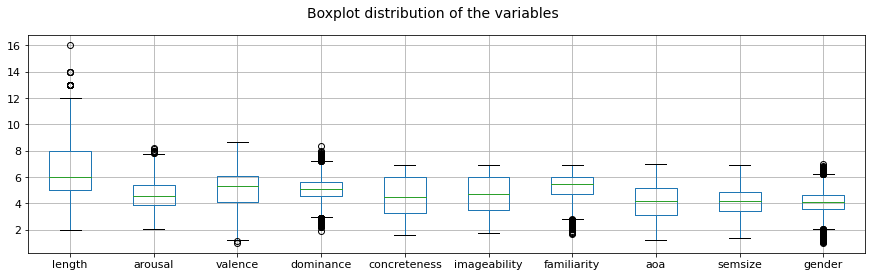

In [18]:
fig = plt.figure(figsize=(15, 4)) 
fig.suptitle('Boxplot distribution of the variables', fontsize=14)
df.boxplot(column=[i for i in df.columns[1:11]], fontsize=11)

<b>I temporarily normalized the data to look at some statistics comparison</b>

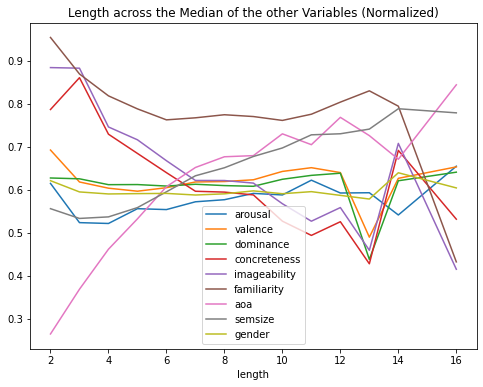

In [19]:
temp_remove = [[i for i in df.columns[0:1]], [i for i in df.columns[11:13]]] #removing the columns to have the mine dimensions of the glasgow norms
df_norm_1 = df.drop(columns=[i for i in itertools.chain.from_iterable(temp_remove)]) #join the two lists

#normalize data:
mdn_record = df_norm_1.values
mdn_columns = df_norm_1.columns
for i, n in enumerate(mdn_columns):
    df_norm_1[n] = mdn_record[:,i] / mdn_record[:,i].max(axis=0) #normalize each column by its max value

df_norm_1['length'] = df['length'] #adding again the length column
#trasforma le colonne in colonne senza la tupla scema
df_mdn = df_norm_1.groupby(['length']).agg([np.median]) #raggruppa per mediana
df_mdn.columns = [df_mdn.columns[i][0] for i in range(0, len(df_mdn.columns))]

df_mdn.plot.line(figsize=(8, 6), title='Length across the Median of the other Variables (Normalized)')
plt.legend(loc='best')

In [20]:
df_norm_1['polysemy'] = df['polysemy']
df_norm_1['web_corpus_freq'] = df['web_corpus_freq'] / df['web_corpus_freq'].max()
df_norm_1['length'] = df_norm_1['length'] / df_norm_1['length'].max()

In [21]:
df_norm_1

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,0.5000,0.513636,0.331213,0.517620,0.786250,0.632618,0.343277,0.969732,0.673032,0.773347,0,0.000079
1,0.3125,0.382169,0.668556,0.557520,0.851254,0.769918,0.479032,0.742648,0.740885,0.473820,0,0.002089
2,0.6250,0.400269,0.607147,0.625373,0.473624,0.457715,0.738003,0.795151,0.385851,0.569646,0,0.000069
3,0.5000,0.512902,0.435642,0.527894,0.485298,0.362484,0.572273,0.894133,0.676939,0.741214,0,0.000061
4,0.6250,0.470344,0.448711,0.573408,0.474488,0.370408,0.446318,0.919093,0.735388,0.655717,0,0.000063
...,...,...,...,...,...,...,...,...,...,...,...,...
4677,0.5000,0.756390,0.578235,0.637080,0.906025,0.891082,0.456406,0.865873,0.790509,0.755846,0,0.001579
4678,0.2500,0.492968,0.483636,0.545574,0.387432,0.562311,0.903444,0.378138,0.254340,0.598479,0,0.015197
4679,0.2500,0.729974,0.788482,0.731215,0.639666,0.581040,0.576452,0.769474,0.381366,0.495194,0,0.000324
4680,0.1875,0.722637,0.721059,0.655238,0.881810,0.927964,0.814959,0.333381,0.700810,0.582269,0,0.005730


In [22]:
#group by polysemy by the mean and add a column with the abs difference
df_poly_mean = df_norm_1.groupby(['polysemy']).agg([np.mean])
df_poly_mean.loc['Abs. Diff.'] = [abs(df_poly_mean.iloc[0][col]-df_poly_mean.iloc[1][col]) for col in df_poly_mean.columns]
#df_poly_mean = df_poly_mean.rename(index={2 : 'Abs. Diff.'}) #to edit the row index

#create ranking of absolute difference
lista_absdiff = df_poly_mean.loc['Abs. Diff.'].values.tolist()
rank_list = [sorted(lista_absdiff, reverse=True).index(x)+1 for x in lista_absdiff]
df_poly_mean.loc['Ranking.'] = rank_list

#remove "mean" from column labels
df_poly_mean.columns = [x for x in df.columns[1:] if x != 'polysemy']

#invert column with rows and sort by ranking
df_poly_mean.T.sort_values(by='Ranking.') 

polysemy,0,1,Abs. Diff.,Ranking.
aoa,0.603926,0.486008,0.117918,1.0
length,0.405371,0.299142,0.106229,2.0
concreteness,0.651192,0.737200,0.086009,3.0
imageability,0.674377,0.749428,0.075051,4.0
semsize,0.604274,0.532178,0.072096,5.0
familiarity,0.755504,0.806947,0.051443,6.0
arousal,0.575540,0.533141,0.042400,7.0
dominance,0.600953,0.622147,0.021194,8.0
web_corpus_freq,0.013561,0.029022,0.015461,9.0
valence,0.587142,0.601110,0.013967,10.0


<b>Here I plotted combination of interesting variables</b>

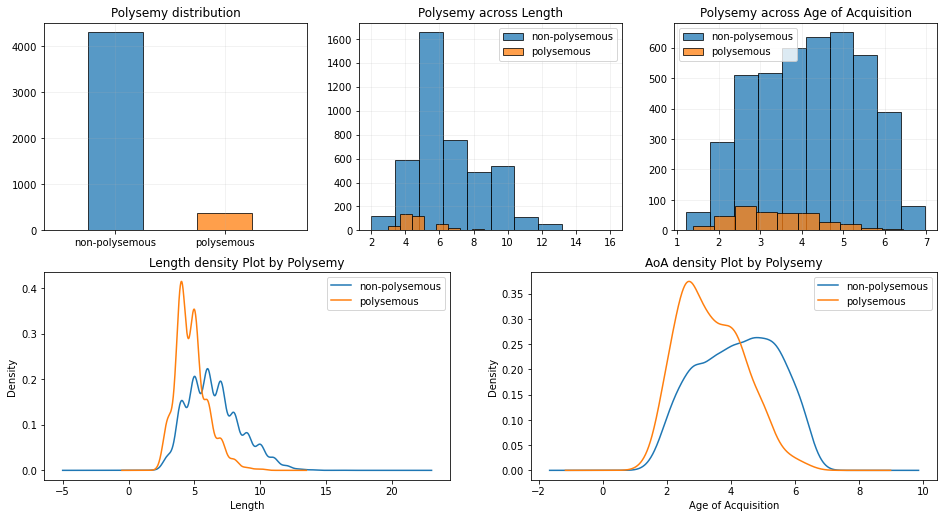

In [23]:
fig = plt.figure(figsize=(16, 13)) 
fig_dims = (3, 3)


plt.subplot2grid(fig_dims, (0, 0), title='Polysemy distribution')
plt.xlim(-0.4, 2)
plt.xticks([0.25, 1.25],['non-polysemous','polysemous'])
plt.hist( df[df['polysemy']==0]['polysemy'], edgecolor='black', label='non-polysemous', alpha=0.75, width=0.5 )
plt.hist( df[df['polysemy']==1]['polysemy'], edgecolor='black', label='polysemous', alpha=0.75, width=0.5 )
plt.grid(alpha=0.2)

plt.subplot2grid(fig_dims, (0, 1), title='Polysemy across Length')
plt.hist( df[df['polysemy']==0]['length'], edgecolor='black', label='non-polysemous', alpha=0.75, )
plt.hist( df[df['polysemy']==1]['length'], edgecolor='black', label='polysemous', alpha=0.75, )
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.2)

plt.subplot2grid(fig_dims, (0, 2), title='Polysemy across Age of Acquisition')
plt.hist( df[df['polysemy']==0]['aoa'], edgecolor='black', label='non-polysemous', alpha=0.75, )
plt.hist( df[df['polysemy']==1]['aoa'], edgecolor='black', label='polysemous', alpha=0.75, )
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.2)

plt.subplot2grid((3,2), (1, 0), title='Length density Plot by Polysemy')
sorted_x_polisemia = sorted(df['polysemy'].unique())
for valori_categorici in sorted_x_polisemia:
    df.length[df.polysemy == valori_categorici].plot(kind='kde')
plt.xlabel('Length')
plt.legend(('non-polysemous', 'polysemous'), loc='best')

plt.subplot2grid((3,2), (1, 1), title='AoA density Plot by Polysemy')
sorted_x_polisemia = sorted(df['polysemy'].unique())
for valori_categorici in sorted_x_polisemia:
    df.aoa[df.polysemy == valori_categorici].plot(kind='kde')
plt.xlabel('Age of Acquisition')
plt.legend(('non-polysemous', 'polysemous'), loc='best')


(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

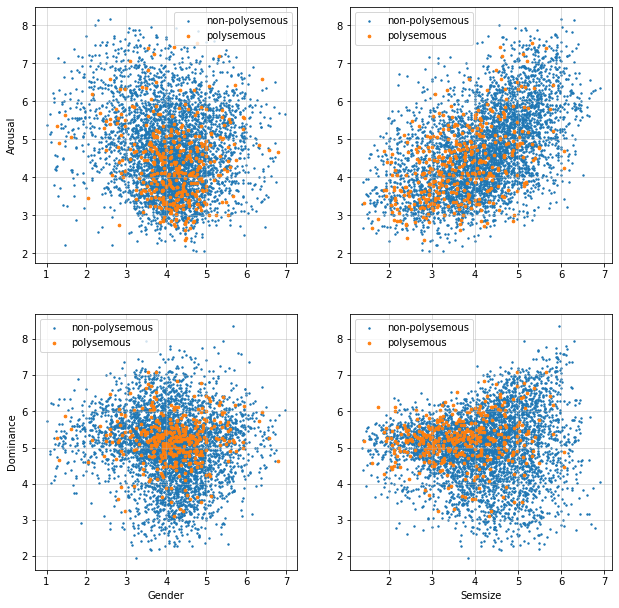

In [24]:
fig = plt.figure(figsize=(16, 16)) 
fig_dims = (3, 3)

x = 'gender'
y = 'arousal'
ax1 = plt.subplot2grid(fig_dims, (0, 0))
vals = list(df['polysemy'].unique())
for val in vals:
    if val == 0:
        labella = 'non-polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=2, label=labella)
    else:
        labella = 'polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=7, label=labella)
ax1.set_ylabel(y[0].upper()+y[1:])
plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

x = 'semsize'
ax4 = plt.subplot2grid(fig_dims, (0, 1))
vals = list(df['polysemy'].unique())
for val in vals:
    if val == 0:
        labella = 'non-polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=2, label=labella)
    else:
        labella = 'polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=7, label=labella)
plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

x = 'gender'
y = 'dominance'
ax2 = plt.subplot2grid(fig_dims, (1, 0))
vals = list(df['polysemy'].unique())
for val in vals:
    if val == 0:
        labella = 'non-polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=2, label=labella)
    else:
        labella = 'polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=7, label=labella)
ax2.set_xlabel(x[0].upper()+x[1:])
ax2.set_ylabel(y[0].upper()+y[1:])
plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

x = 'semsize'
ax5 = plt.subplot2grid(fig_dims, (1, 1))
vals = list(df['polysemy'].unique())
for val in vals:
    if val == 0:
        labella = 'non-polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=2, label=labella)
    else:
        labella = 'polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=7, label=labella)
ax5.set_xlabel(x[0].upper()+x[1:])
plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

<b>Then I wrote a function to search for outliers</b>

In [25]:
def find_outliers(dataframe, original = None):
    df_x_outliers = dataframe._get_numeric_data().drop(columns=['polysemy'])
    
    number_of_trues = [] #num of inliers, true is a remnant for the fact that at first I wanted to extract only the inliers insied the "range"
    number_of_outliers = []
    
    ls_count_outliers = []
    true_false_dict = {}
    outlier_index_dict = {}
    
    ls_outliers_w_duplicates = []
    outlier_ls = []

    for x in df_x_outliers.columns:
        q1 = df_x_outliers[x].quantile(0.25)
        q3 = df_x_outliers[x].quantile(0.75)
        IQR = q3 - q1
        q_high = q3 + 1.5*IQR
        q_low = q1 - 1.5*IQR
        series_of_inliers = (df_x_outliers[x] < q_high) & (df_x_outliers[x] > q_low) #the values between the range are inliers
        
        true_false_dict[x] = series_of_inliers #this dictionary now stores inliers (True) and outlier (False) for each feature
        outlier_index_dict[x] = series_of_inliers.index[series_of_inliers == False].tolist() #save the indexes of the outliers
        
        str_of_false = str(series_of_inliers.value_counts()) #just to have the metrics for the next two lines
        str_of_false = str_of_false[:-14]
        number_of_trues.append(int(re.findall(r'\d+', str_of_false)[0])) #extract num of inliers from string
        try:
            number_of_outliers.append(int(re.findall(r'\d+', str_of_false)[1])) #extract num of outliers from string
        except IndexError: #in case there is no outlier there's no number to find
            number_of_outliers.append(0)
        ls_count_outliers.append(str_of_false) #I saved it but it's not really needed

    outliers_dataframe = pd.DataFrame(columns=df_x_outliers.columns)
    outliers_dataframe.loc['Inliers'] = number_of_trues
    outliers_dataframe.loc['Outliers'] = number_of_outliers
    
    num_df_sine_outliers = pd.DataFrame() #this will be the numeric dataframe
    
    for key in outlier_index_dict.keys():
        ls_outliers_w_duplicates.append(outlier_index_dict[key]) #add list of indexes to this list, duplicates included

    ls_outliers_w_duplicates = list(itertools.chain.from_iterable(ls_outliers_w_duplicates)) #join the list of lists
    
    for x in ls_outliers_w_duplicates:
        if x not in outlier_ls: #so that I get an element only once
            outlier_ls.append(x)

    outlier_ls.sort(reverse=False)

    num_df_sine_outliers = df_x_outliers.drop(outlier_ls).copy(deep=True)
    if original is not None:  #I was tinkering with it but I left it unfinished
        arche_sine_outliers = original.drop(outlier_ls).copy(deep=True) #it gets the dataframe of inliers with also non numeric values
    else:
        arche_sine_outliers = original
        
    outin_col = sum(number_of_outliers) #It's the number of outliers not considering that some of them are outliers for multiple features
    outin_df = len(outlier_ls) #It's the number of unique outliers in the entire dataset

    ls_count_outliers = '\n'.join(ls_count_outliers) #as the following outliers_dataframe but not visually appealing
    outliers_dataframe["Tot. in Output Dataframe"] = [len(num_df_sine_outliers.index), len(df_x_outliers.index)-len(num_df_sine_outliers.index)]
    
    dizionario_analisi = {'ls': ls_count_outliers, 'o' : arche_sine_outliers, 'ndf_so' : num_df_sine_outliers, 'df_o' : outliers_dataframe, 'list_indexes' : outlier_ls, 'list_x_duplicates': ls_outliers_w_duplicates}
    return dizionario_analisi

In [26]:
analisi_outliers = find_outliers(df)
outliers_dataframe = analisi_outliers['df_o']
outliers_dataframe.T

,Inliers,Outliers
length,4666,16
arousal,4671,11
valence,4680,2
dominance,4549,133
concreteness,4682,0
imageability,4682,0
familiarity,4627,55
aoa,4682,0
semsize,4682,0
gender,4518,164


In [27]:
i_outliers_multiple = analisi_outliers['list_x_duplicates']
duplicates_ls = []

for i in analisi_outliers['list_indexes']:
    if i_outliers_multiple.count(i) >= 2: #to have only the outlier words appearing in at least that number of features
        duplicates_ls.append(i)

In [28]:
df.loc[duplicates_ls] #these are the values considered outliers in at least 2 features (word and polysemy excluded)

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
77,adventure,9,7.853,7.971,7.313,2.912,4.743,5.576,2.941,6.118,4.794,0,34807033.0
368,beautiful,9,7.029,8.441,6.344,2.515,5.412,6.517,2.559,5.333,1.441,0,58503804.0
369,beauty,6,6.781,7.344,5.594,2.727,4.313,5.867,3.333,4.625,1.807,0,87572240.0
512,boy,3,4.294,5.600,5.229,6.412,6.485,6.636,1.424,3.375,6.529,0,58664244.0
749,choose,6,4.882,6.382,7.235,2.677,2.912,6.097,2.471,4.576,3.824,0,90010174.0
863,communication,13,5.200,7.400,6.029,3.824,4.200,6.147,4.457,5.412,3.486,0,64378554.0
1070,dad,3,4.912,6.849,4.618,6.257,6.400,6.853,1.265,5.147,6.706,0,161867097.0
1180,determination,13,7.235,8.029,7.500,2.242,3.000,5.839,5.059,5.875,4.161,0,17237730.0
1407,embarrassment,13,4.849,2.258,2.882,3.065,4.094,6.030,4.000,5.514,3.441,0,1242414.0
1801,genocide,8,6.219,1.125,2.875,4.625,3.719,3.966,6.281,6.688,5.433,0,2790711.0


<b>Then I transformed web_corpus_freq as it's heavy tailed from the boxplot</b>

<AxesSubplot:xlabel='web_corpus_freq'>

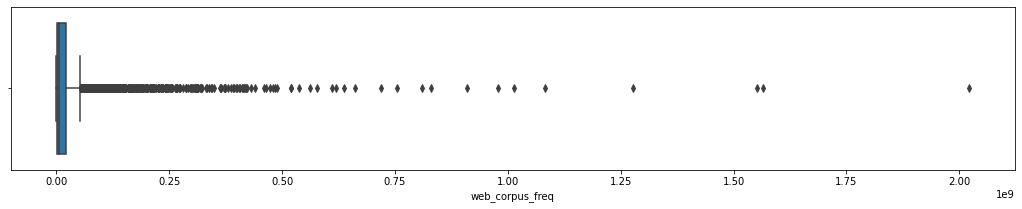

In [29]:
fig = plt.figure(figsize=(18, 3))
sns.boxplot(x=df['web_corpus_freq'])

In [30]:
df['web_corpus_freq'] = np.log(df['web_corpus_freq']) #log transformation

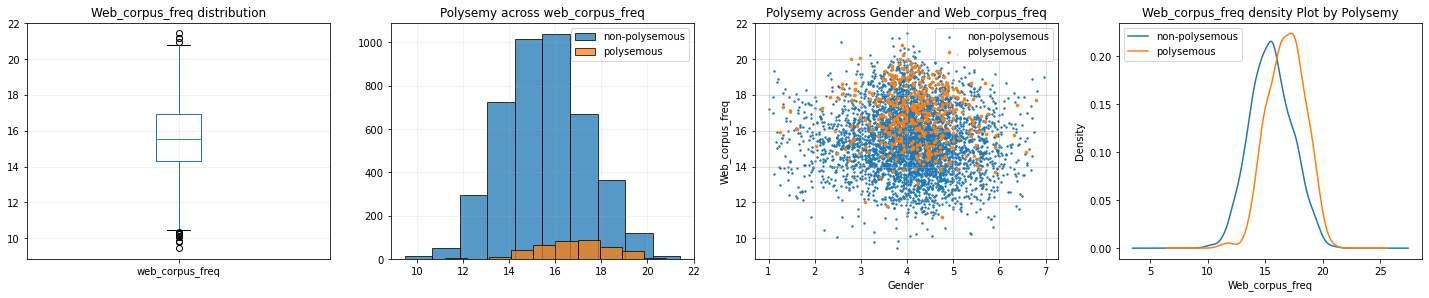

In [31]:
fig = plt.figure(figsize=(25, 20)) 
fig_dims = (4, 4)

plt.subplot2grid(fig_dims, (0, 0), title='Web_corpus_freq distribution')
boxplot = df.boxplot(column=[df.columns[12]])
plt.grid(alpha=0.2)

plt.subplot2grid(fig_dims, (0, 1), title='Polysemy across web_corpus_freq')
plt.hist( df[ df['polysemy']==0 ]['web_corpus_freq'], edgecolor='black', label='non-polysemous', alpha=0.75,   )
plt.hist( df[ df['polysemy']==1 ]['web_corpus_freq'], edgecolor='black', label='polysemous', alpha=0.75,  )
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.2)

x = 'gender'
y = 'web_corpus_freq'
ax6 = plt.subplot2grid(fig_dims, (0, 2), title='Polysemy across Gender and Web_corpus_freq')
vals = list(df['polysemy'].unique())
for val in vals:
    if val == 0:
        labella = 'non-polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=2, label=labella)
    else:
        labella = 'polysemous'
        df_val = df[df['polysemy']==val]
        plt.scatter(df_val[x], df_val[y], s=7, label=labella)
ax6.set_xlabel(x[0].upper()+x[1:])
ax6.set_ylabel(y[0].upper()+y[1:])
plt.grid(alpha=0.5)
plt.legend(loc='best')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot2grid(fig_dims, (0, 3), title='Web_corpus_freq density Plot by Polysemy')
sorted_x_polisemia = sorted(df['polysemy'].unique())
for valori_categorici in sorted_x_polisemia:
    df.web_corpus_freq[df.polysemy == valori_categorici].plot(kind='kde')
plt.xlabel('Web_corpus_freq')
plt.legend(('non-polysemous', 'polysemous'), loc='best')

In [32]:
df = df.rename({'web_corpus_freq' : 'log_web_corpus_freq'}, axis='columns')

In [33]:
find_outliers(df)['df_o'].T #I just recompute the outliers

,Inliers,Outliers
length,4666,16
arousal,4671,11
valence,4680,2
dominance,4549,133
concreteness,4682,0
imageability,4682,0
familiarity,4627,55
aoa,4682,0
semsize,4682,0
gender,4518,164


<b>I plotted the correlations into a more visually appealing heatmap and I extracted the most correlated variables</b>

<AxesSubplot:>

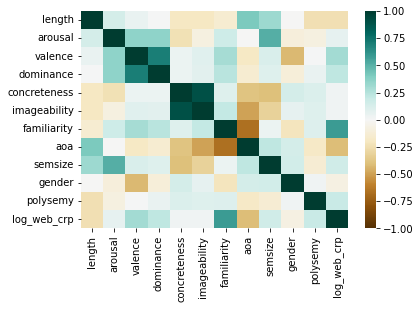

In [34]:
dataframe_spearman_corr = df.corr('spearman')
dataframe_spearman_corr.columns.values[-1] = 'log_web_crp'
sns.heatmap(dataframe_spearman_corr, vmin=-1, vmax=1, cmap='BrBG')

In [35]:
print(corr_info(df, 0.6, "spearman", "str")) #with the function I wrote before

Number of highly correlated variables (greater than 0.6 of correlatedon with the spearman method):
3

Unique values:

[ 0.70225185  0.90358743 -0.67050655]

valence(column):
dominance    0.702252

dominance(column):
valence    0.702252

concreteness(column):
imageability    0.903587

imageability(column):
concreteness    0.903587

familiarity(column):
aoa   -0.670507

aoa(column):
familiarity   -0.670507


<b>Then I wanted to further see if there were differences with respect to gender for these 3 pairs</b>

In [36]:
cut_gender = pd.cut(df.gender, bins=3)
binned_by_gender = df.copy(deep=True)
binned_by_gender['gender'] = cut_gender
binned_by_gender.groupby(['gender']).agg([np.mean])

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,polysemy,log_web_corpus_freq
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
gender,,,,,,,,,,,
"(0.994, 2.99]",6.391650,5.367930,6.426048,5.318543,4.712567,5.222787,5.532129,3.758089,3.922694,0.059642,15.512691
"(2.99, 4.981]",6.322184,4.540599,5.031346,4.985499,4.420490,4.531032,5.276974,4.175829,4.096257,0.085763,15.705824
"(4.981, 6.971]",6.450808,4.875063,4.382427,5.148170,5.207043,5.340026,5.049740,4.261612,4.500467,0.071953,15.290970


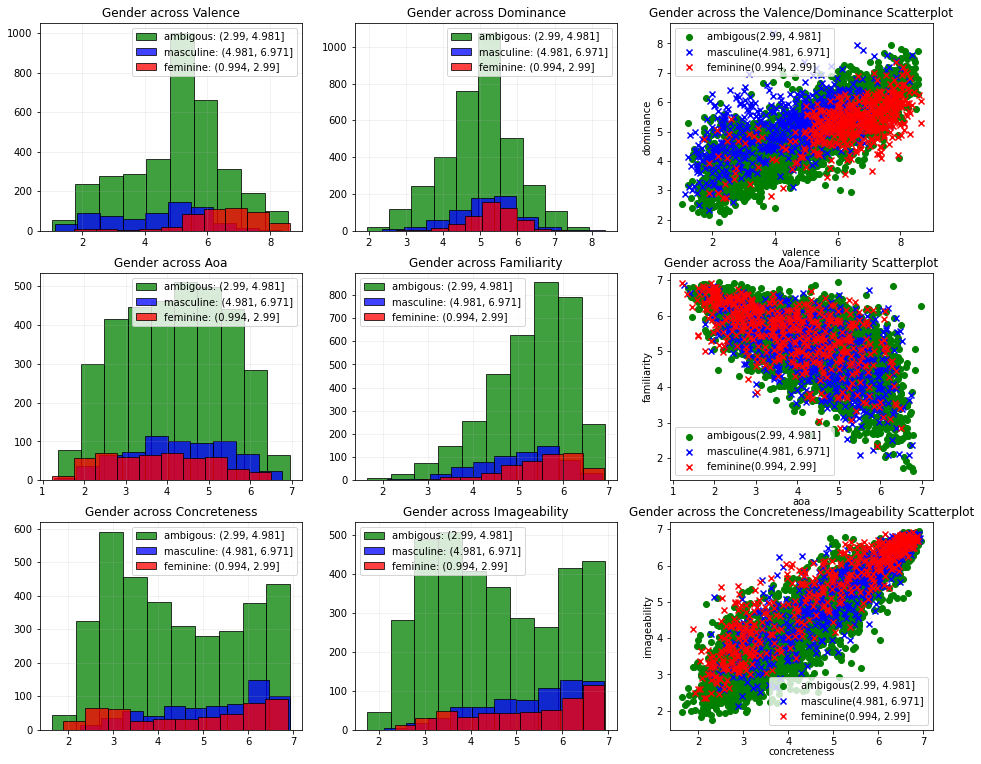

In [37]:
fig = plt.figure(figsize=(16, 13)) 
fig_dims = (3, 3)

gender_explained_dict = {1: 'ambigous', 2: 'masculine', 0: 'feminine'}
gender_color_dict = {1: 'g', 2: 'b', 0: 'r'}
pair = [["valence", "dominance"], ['aoa', 'familiarity'], ['concreteness', 'imageability']]

for l in range(3):
    firstp = pair[l][0]
    secondp = pair[l][1]
    plt.subplot2grid(fig_dims, (l, 2), title='Gender across the ' + firstp[0].upper() + firstp[1:] + '/' + secondp[0].upper() + secondp[1:] + ' Scatterplot')
    for key, value in gender_explained_dict.items():
        if key == 1:
            mark = 'o'
        else:
            mark = 'x'
        plt.scatter(binned_by_gender[binned_by_gender['gender'] == sorted(binned_by_gender['gender'].unique())[key]][firstp], 
                    binned_by_gender[binned_by_gender['gender'] == sorted(binned_by_gender['gender'].unique())[key]][secondp], color=gender_color_dict[key], marker=mark, label=value + str(sorted(binned_by_gender['gender'].unique())[key]))
    plt.xlabel(firstp, labelpad=0)
    plt.ylabel(secondp)
    plt.legend()

    for n, var in enumerate(pair[l]):
        plt.subplot2grid(fig_dims, (l, n), title='Gender across ' + var[0].upper() + var[1:])
        for key, value in gender_explained_dict.items():
            plt.hist( binned_by_gender[ binned_by_gender['gender']==sorted(binned_by_gender['gender'].unique())[key]  ][var], color=gender_color_dict[key], 
                     edgecolor='black', label=value + ': ' + str(sorted(binned_by_gender['gender'].unique())[key]), alpha=0.75,  )
        plt.legend(loc='best', fontsize=10)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(alpha=0.2)

In [38]:
color_dict = {}
for n, c in enumerate(['r', 'g', 'b']):
    color_dict[c] = sorted(binned_by_gender['gender'].unique())[n]

color_dict.items()

dict_items([('r', Interval(0.994, 2.99, closed='right')), ('g', Interval(2.99, 4.981, closed='right')), ('b', Interval(4.981, 6.971, closed='right'))])

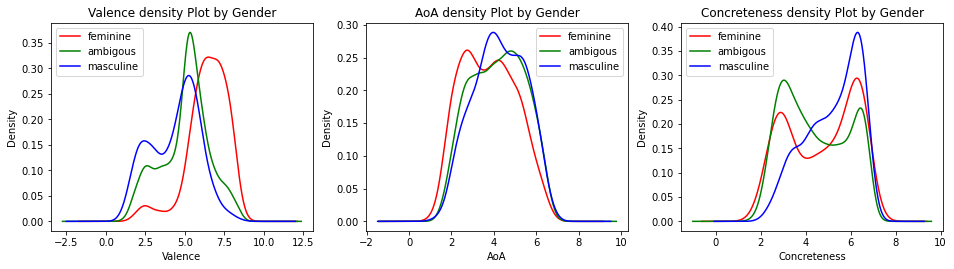

In [39]:
fig = plt.figure(figsize=(16, 13)) 
fig_dims = (3, 3)

plt.subplot2grid((3,3), (0, 0), title='Valence density Plot by Gender')
sorted_x_gender = sorted(binned_by_gender['gender'].unique())
for key, value in color_dict.items():
    binned_by_gender.valence[binned_by_gender.gender == value].plot(kind='kde', color=[key])
plt.xlabel('Valence')
plt.legend(('feminine', 'ambigous', 'masculine'), loc='best')

plt.subplot2grid((3,3), (0, 1), title='AoA density Plot by Gender')
sorted_x_gender = sorted(binned_by_gender['gender'].unique())
for key, value in color_dict.items():
    binned_by_gender.aoa[binned_by_gender.gender == value].plot(kind='kde', color=[key])
plt.xlabel('AoA')
plt.legend(('feminine', 'ambigous', 'masculine'), loc='best')

plt.subplot2grid((3,3), (0, 2), title='Concreteness density Plot by Gender')
sorted_x_gender = sorted(binned_by_gender['gender'].unique())
for key, value in color_dict.items():
    binned_by_gender.concreteness[binned_by_gender.gender == value].plot(kind='kde', color=[key])
plt.xlabel('Concreteness')
plt.legend(('feminine', 'ambigous', 'masculine'), loc='best')

<b>Then I moved to select the most important features, first I computed some VIFs</b>

In [40]:
Y = df._get_numeric_data().drop(columns=['length','polysemy'])
vif_data = pd.DataFrame()
vif_data["Variabile"] = Y.columns
vif_data["VIF_ALL"] = [variance_inflation_factor(Y.values, i) for i in range(len(Y.columns))]
vif_data

,Variabile,VIF_ALL
0,arousal,35.744955
1,valence,33.824141
2,dominance,75.967386
3,concreteness,89.321542
4,imageability,101.056583
5,familiarity,70.411441
6,aoa,14.597034
7,semsize,33.110397
8,gender,32.351624
9,log_web_corpus_freq,106.231973


In [41]:
vif_to_compute = [] #to store combinations of vif to compute

In [42]:
X = df._get_numeric_data()
all_combinations = []
for r in range(2, 3): #loop in the number of possible variable to consider (I keep a strict range because it's not that efficient)
    combinations_object = itertools.combinations([i for i in list(X.columns[:]) if i not in ['polysemy', 'length']], r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list
len(all_combinations)

vif_max_value = 5.0 #now i look for the a vif lower than 5
lista_vif = []
for i in all_combinations:
    dictat = {}
    for r in range(0, len(i)):
        dictat[i[r]] = df[i[r]]
    Z = pd.DataFrame(dictat)
    vif_search = pd.DataFrame()
    vif_search["Variabile"] = Z.columns
    vif_search["VIF"] = [variance_inflation_factor(Z.values, i) for i in range(len(Z.columns))]
    verifica_vero = [float(dict(vif_search['VIF'])[r]) <= vif_max_value for r in range(len(dict(vif_search['VIF'])))]
    if sum(verifica_vero) == len(verifica_vero):
        lista_vif.append(vif_search)
print('Combinazioni con VIF tollerabile:', len(lista_vif))

for i in range(0, len(lista_vif)):
    combin = dict(lista_vif[i])['Variabile']
    print(combin)
    comb_to_save = []
    for x in range(0,2):
        comb_to_save.append(combin[x])
    vif_to_compute.append(comb_to_save)

Combinazioni con VIF tollerabile: 2
0    concreteness
1             aoa
Name: Variabile, dtype: object
0    imageability
1             aoa
Name: Variabile, dtype: object


In [43]:
X = df._get_numeric_data()
all_combinations = []
for r in range(3, 5): #loop in the number of possible variable to consider (I keep a strict range because it's not that efficient)
    combinations_object = itertools.combinations([i for i in list(X.columns[:]) if i not in ['polysemy', 'length']], r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list
len(all_combinations)

vif_max_value = 10.0 #now i look for the a vif lower than 10
lista_vif = []
for i in all_combinations:
    dictat = {}
    for r in range(0, len(i)):
        dictat[i[r]] = df[i[r]]
    Z = pd.DataFrame(dictat)
    vif_search = pd.DataFrame()
    vif_search["Variabile"] = Z.columns
    vif_search["VIF"] = [variance_inflation_factor(Z.values, i) for i in range(len(Z.columns))]
    verifica_vero = [float(dict(vif_search['VIF'])[r]) <= vif_max_value for r in range(len(dict(vif_search['VIF'])))]
    if sum(verifica_vero) == len(verifica_vero):
        lista_vif.append(vif_search)
print('Combinazioni con VIF tollerabile:', len(lista_vif))

for i in range(0, len(lista_vif)):
    combin = dict(lista_vif[i])['Variabile']
    print(combin)
    comb_to_save = []
    for x in range(0,3):
        comb_to_save.append(combin[x])
    vif_to_compute.append(comb_to_save)

Combinazioni con VIF tollerabile: 3
0         valence
1    concreteness
2             aoa
Name: Variabile, dtype: object
0         valence
1    concreteness
2         semsize
Name: Variabile, dtype: object
0         valence
1    imageability
2             aoa
Name: Variabile, dtype: object


In [44]:
vif_to_compute

[['concreteness', 'aoa'],
 ['imageability', 'aoa'],
 ['valence', 'concreteness', 'aoa'],
 ['valence', 'concreteness', 'semsize'],
 ['valence', 'imageability', 'aoa']]

In [45]:
for n, el in enumerate(vif_to_compute):
    drop_list = [x for x in df.columns if x not in el and x not in ['word']]
    temp_df_x_vif = df._get_numeric_data().drop(columns=drop_list)
    temp_vif = pd.DataFrame()
    temp_vif["Variabile"] = temp_df_x_vif.columns
    temp_vif["VIF"] = [variance_inflation_factor(temp_df_x_vif.values, i) for i in range(len(temp_df_x_vif.columns))]
    temp_vif = temp_vif.T
    temp_vif.columns = [temp_vif.iloc[0]]
    temp_vif = temp_vif[1:]

    for x in drop_list:
        temp_vif[x] = '*'

    temp_vif = temp_vif[['arousal', 'valence', 'dominance', 'concreteness', 'imageability', 'familiarity', 'aoa', 'semsize', 'gender', 'log_web_corpus_freq']]
    vif_data['VIF_'+str(n)] = temp_vif.T['VIF'].tolist()

In [46]:
col_adjust = {'VIF_0' : 'VIF_<5*', 'VIF_1' : 'VIF_<5**', 'VIF_2' : 'VIF_<10*', 'VIF_3' : 'VIF_<10**', 'VIF_4' : 'VIF_<10***'}
vif_data = vif_data.rename(col_adjust, axis='columns')
vif_data

,Variabile,VIF_ALL,VIF_<5*,VIF_<5**,VIF_<10*,VIF_<10**,VIF_<10***
0,arousal,35.744955,*,*,*,*,*
1,valence,33.824141,*,*,8.001543,9.990872,8.736878
2,dominance,75.967386,*,*,*,*,*
3,concreteness,89.321542,4.440176,*,6.939817,6.803427,*
4,imageability,101.056583,*,4.434169,*,*,7.567329
5,familiarity,70.411441,*,*,*,*,*
6,aoa,14.597034,4.440176,4.434169,5.75301,*,5.630403
7,semsize,33.110397,*,*,*,8.276817,*
8,gender,32.351624,*,*,*,*,*
9,log_web_corpus_freq,106.231973,*,*,*,*,*


In [47]:
df_preprocess_backup = df.copy(deep=True)

<b>Finally I decided to opt for a principal component analysis</b>

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

df = df_preprocess_backup.drop(columns=['word', 'polysemy', 'length'])
X = df.values
X_scaled = MinMaxScaler().fit_transform(X)

pca = PCA()
x_new = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(x_new, columns=['PC'+str(i) for i in range(1, pca.n_components_+1)])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.232740,-0.724440,-0.396598,0.166168,0.050545,-0.007271,-0.075283,-0.087475,0.020826,0.091627
1,-0.104886,-0.263393,-0.316780,-0.065517,0.111090,0.311994,-0.258492,-0.074187,0.068319,0.025277
2,0.366162,-0.234946,-0.029486,-0.399251,-0.010126,-0.157571,0.029249,0.231652,-0.040616,0.016270
3,0.622461,-0.407282,-0.127518,0.023485,0.035491,-0.105136,-0.073130,0.101305,-0.070173,0.116379
4,0.666668,-0.435690,-0.231364,-0.022669,0.039891,-0.032176,-0.181641,0.035428,0.045303,0.099228
...,...,...,...,...,...,...,...,...,...,...
4677,-0.130470,-0.250550,-0.586952,0.387615,0.053870,0.056333,0.016716,-0.175130,0.013290,-0.016406
4678,0.105405,0.059466,0.529961,-0.304618,-0.038473,-0.223580,0.138930,-0.068612,-0.048220,-0.148810
4679,0.154996,0.009607,-0.407161,-0.304410,-0.134939,-0.174481,0.129422,-0.108868,-0.041650,0.058983
4680,-0.485312,0.273007,-0.085437,0.211113,-0.082492,-0.017911,-0.106336,-0.074494,-0.011590,0.031681


In [49]:
pca.explained_variance_ratio_

array([0.40030014, 0.21542053, 0.11943273, 0.09722428, 0.05744682,
       0.03971437, 0.02592105, 0.02073594, 0.01316608, 0.01063807])

Text(0, 0.5, 'Explained Variance Ratio')

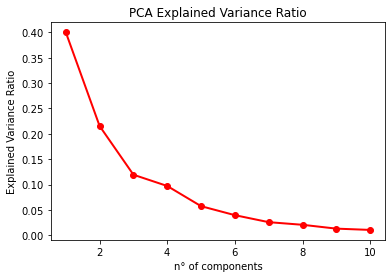

In [50]:
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("PCA Explained Variance Ratio")
plt.xlabel("n° of components")
plt.ylabel("Explained Variance Ratio")

<b>3 components should be enough, thus I computed their loadings</b>

In [51]:
df_pca = df_pca.T[:3].T
df_pca #before I reduced the PC considered

,PC1,PC2,PC3
0,0.232740,-0.724440,-0.396598
1,-0.104886,-0.263393,-0.316780
2,0.366162,-0.234946,-0.029486
3,0.622461,-0.407282,-0.127518
4,0.666668,-0.435690,-0.231364
...,...,...,...
4677,-0.130470,-0.250550,-0.586952
4678,0.105405,0.059466,0.529961
4679,0.154996,0.009607,-0.407161
4680,-0.485312,0.273007,-0.085437


In [52]:
loadings = pd.DataFrame((abs(pca.components_)), columns=df.columns.tolist(), index=['PC'+str(i) for i in range(1, pca.n_components_+1)])[:3]
loadings

,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,log_web_corpus_freq
PC1,0.089786,0.080495,0.039091,0.633133,0.623281,0.147203,0.351046,0.214644,0.000224,0.060164
PC2,0.362027,0.539855,0.313917,0.198480,0.066636,0.382417,0.329877,0.216316,0.200428,0.305102
PC3,0.278788,0.448500,0.306564,0.236097,0.186831,0.419249,0.514833,0.139636,0.019785,0.275287


(0.0, 0.68)

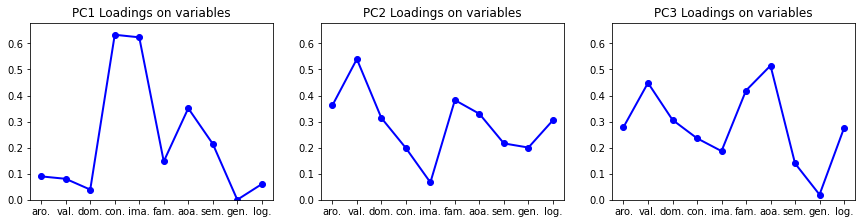

In [53]:
fig = plt.figure(figsize=(20, 15))
fig_dims = (4, 4)

plt.subplot2grid(fig_dims, (0, 0))
plt.plot(range(0, 10), loadings.T['PC1'], 'bo-', linewidth=2)
plt.xticks(range(0, 10), [i[:3]+'.' for i in loadings.columns.tolist()])
plt.title('PC1 Loadings on variables')
plt.ylim(0.0, 0.68)

plt.subplot2grid(fig_dims, (0, 1))
plt.plot(range(0, 10), loadings.T['PC2'], 'bo-', linewidth=2)
plt.xticks(range(0, 10), [i[:3]+'.' for i in loadings.columns.tolist()])
plt.title('PC2 Loadings on variables')
plt.ylim(0.0, 0.68)

plt.subplot2grid(fig_dims, (0, 2))
plt.plot(range(0, 10), loadings.T['PC3'], 'bo-', linewidth=2)
plt.xticks(range(0, 10), [i[:3]+'.' for i in loadings.columns.tolist()])
plt.title('PC3 Loadings on variables')
plt.ylim(0.0, 0.68)

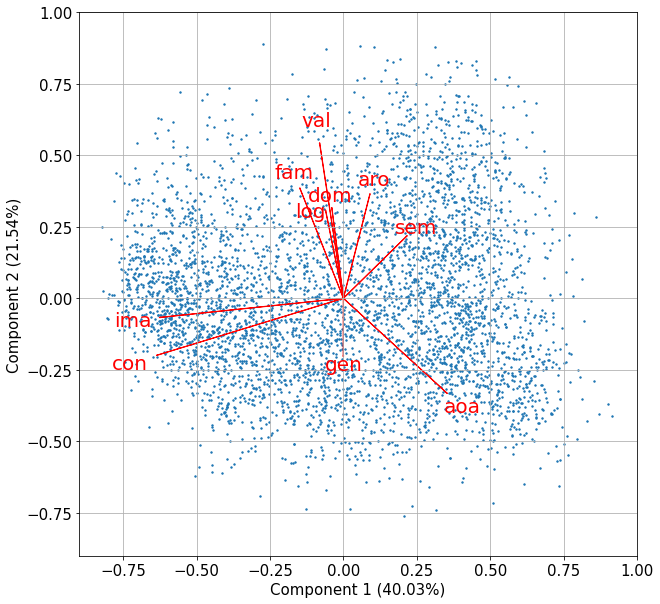

In [54]:
def plot_pca(score, coeff):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1
    scaley = 1
    plt.figure(figsize=(10, 10))
    plt.scatter(xs * scalex,ys * scaley, s=2)
    fattore = 1
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*fattore, coeff[i,1]*fattore, color = 'r')
        if df.columns[i] == 'log_web_corpus_freq':
            plt.text(coeff[i,0]*(fattore), coeff[i,1] *(fattore), df.columns[i][:3], color = 'r', ha = 'right', va = 'center', fontsize=20)
        else:
            plt.text(coeff[i,0]*(fattore+0.15), coeff[i,1] *(fattore+0.15), df.columns[i][:3], color = 'r', ha = 'center', va = 'center', fontsize=20)
    plt.ylim(-0.9,1)
    plt.xlim(-0.9,1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Component {} ({}%)".format(1, (pca.explained_variance_ratio_[0]*10000 //1)/100), fontsize=15)
    plt.ylabel("Component {} ({}%)".format(2, (pca.explained_variance_ratio_[1]*10000 //1)/100), fontsize=15)
    plt.grid()

#Calling the function I used the first two PC
plot_pca(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()